## Importing the libraries

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Importing the dataset

In [2]:
data =pd.read_csv(r"/content/drive/MyDrive/iFood Data Analyst Case.csv")

## Initial Data Exploration

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.shape

(2240, 29)

In [5]:
#Seeing the columns
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Creating relevant features

In [7]:
# Calculate total number of children in the household
data['TotalChildren'] = data['Kidhome'] + data['Teenhome']

# Calculate total amount spent across all categories
data['TotalSpent'] = (data['MntFishProducts'] + data['MntMeatProducts'] + data['MntFruits'] +
                      data['MntSweetProducts'] + data['MntWines'] + data['MntGoldProds'])


## Dealing With Duplicate Rows and Missing Values

In [8]:
#Number of rows duplicated
data.duplicated().sum()

0

In [9]:
#Number of missing values in each column
data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [10]:
# Calculate the median income
median_income = data['Income'].median()


# Fill missing values with the median
data['Income'].fillna(median_income, inplace=True)
data.isna().sum()

<ipython-input-10-81009ea0b081>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(median_income, inplace=True)


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [11]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalChildren,TotalSpent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.950446,605.798214
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.751803,602.249288
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,5.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,68.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,396.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,1045.500000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,3.000000,2525.000000


## Exploratory Data Analysis

### Campaign Offer Acquisition Rates

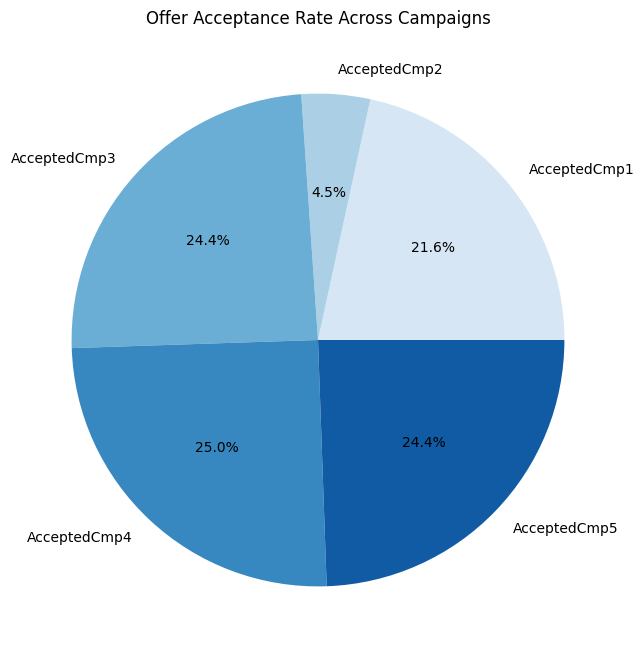

In [12]:
# Calculate acceptance rates across all campaigns
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptance_rates = data[campaigns].mean() * 100

# Plot the acceptance rates as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(acceptance_rates, labels=acceptance_rates.index, autopct='%1.1f%%', colors=sns.color_palette('Blues', len(acceptance_rates)))
plt.title('Offer Acceptance Rate Across Campaigns')
plt.show()


This pie chart highlights the effectiveness of different campaigns, indicating which Campaign 4 had the highest success rates.

### Complaint Ratio

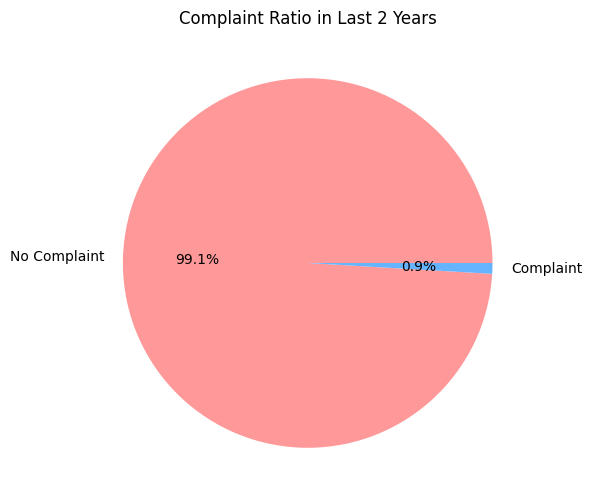

In [13]:
# Plot complaint ratio as a pie chart
complaint_ratio = data['Complain'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
plt.pie(complaint_ratio, labels=['No Complaint', 'Complaint'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Complaint Ratio in Last 2 Years')
plt.show()


As complaints are much less compared to No complaints ,it can be attributed to high customer satisfaction

### Education Level Distribution

<ipython-input-14-bb4e7ca68e09>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=data, palette='coolwarm')


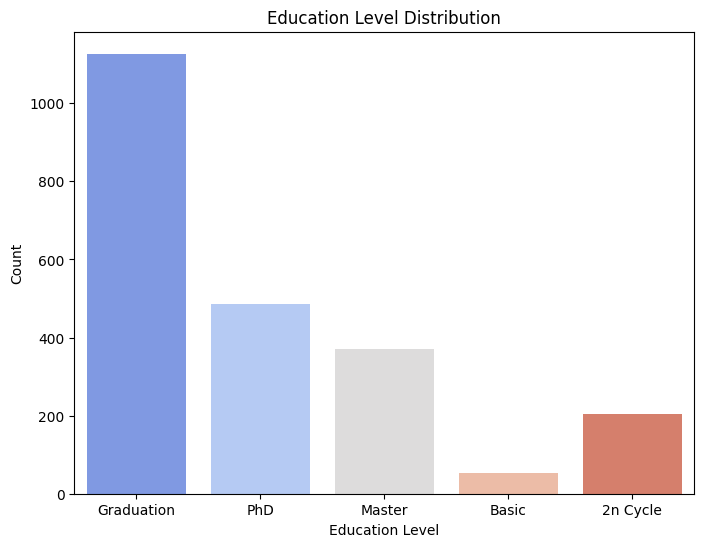

In [14]:
# Plot education level distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=data, palette='coolwarm')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


 Understanding the education level distribution allows for targeted marketing messages that resonate with customers' educational backgrounds.

### Marital Status Distribution

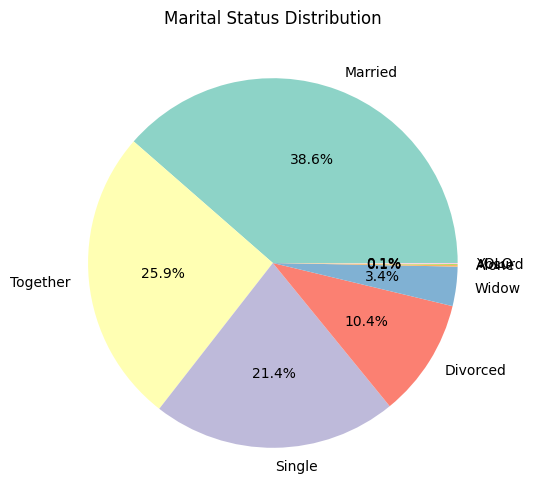

In [15]:
# Plot marital status distribution as a pie chart
marital_counts = data['Marital_Status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3', len(marital_counts)))
plt.title('Marital Status Distribution')
plt.show()


Knowing marital status helps in segmentation and personalized marketing for single vs. married customers, as they may have different preferences.

### Income Distribution

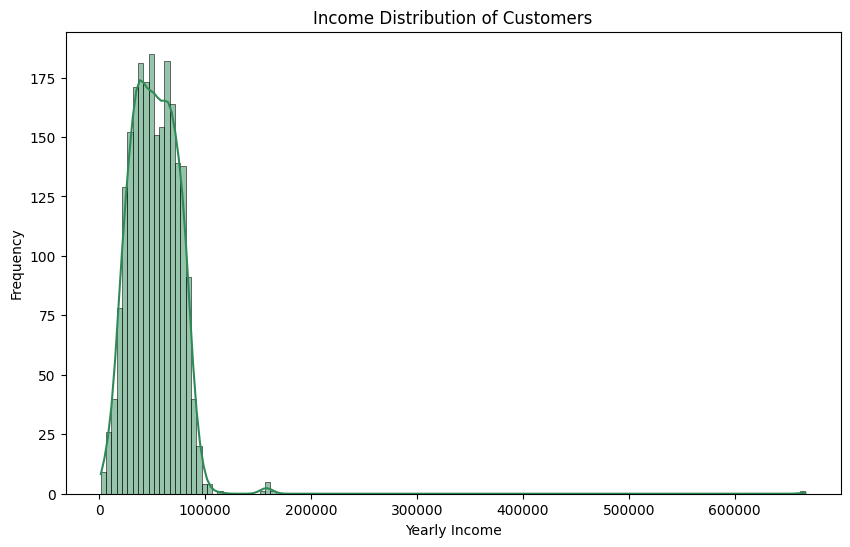

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Income'], kde=True, color='seagreen')
plt.title('Income Distribution of Customers')
plt.xlabel('Yearly Income')
plt.ylabel('Frequency')
plt.show()


 Income distribution reveals purchasing power, allowing campaigns to be tailored to specific income brackets.

### Spending Distribution Across Product Categories

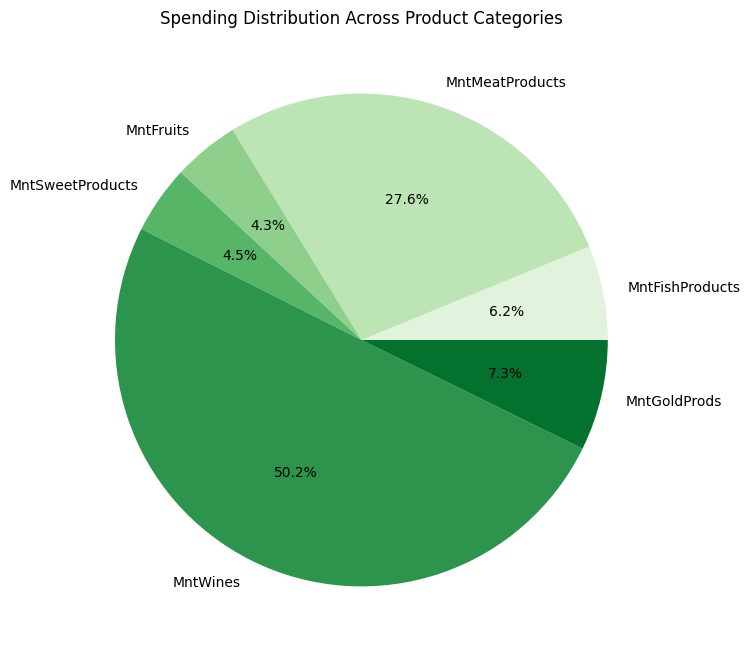

In [17]:
# Plot spending by different product categories as a pie chart
categories = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']
category_sums = data[categories].sum()

plt.figure(figsize=(8, 8))
plt.pie(category_sums, labels=category_sums.index, autopct='%1.1f%%', colors=sns.color_palette('Greens', len(category_sums)))
plt.title('Spending Distribution Across Product Categories')
plt.show()


This spending breakdown by category provides insight into popular products like wine and meat products, guiding inventory and promotion planning

### Purchases by Sales Channels and Income group

<ipython-input-18-7a16ce17c71b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_sums.index, y=channel_sums.values, palette='Purples')


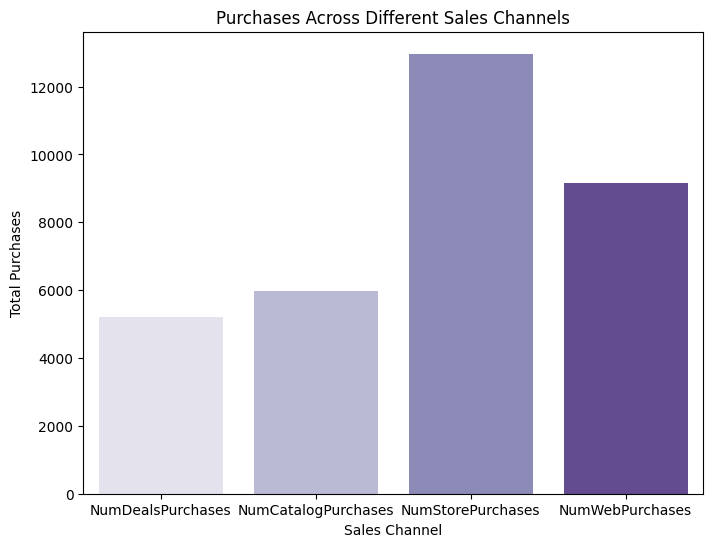

In [18]:
# Plot number of purchases by different sales channels
channels = ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
channel_sums = data[channels].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=channel_sums.index, y=channel_sums.values, palette='Purples')
plt.title('Purchases Across Different Sales Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Total Purchases')
plt.show()


Channel-wise purchase distribution identifies preferred customer purchase which in this case is store purchase, supporting channel-specific marketing

<ipython-input-19-076ee09e55b3>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_channels = data.groupby('IncomeGroup')[channels].mean()


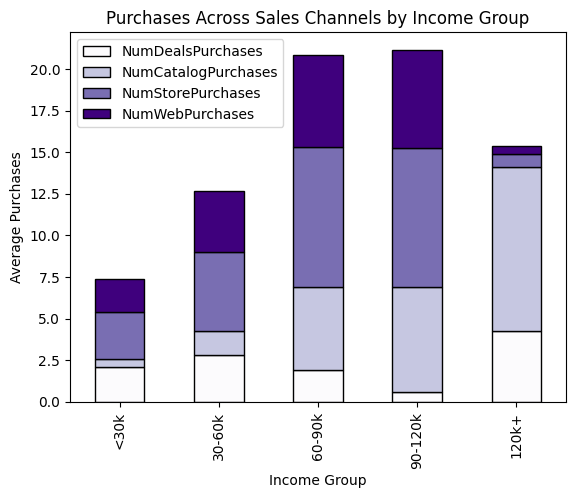

In [19]:
# Plot number of purchases by different sales channels segmented by income groups
income_bins = [0, 30000, 60000, 90000, 120000, data['Income'].max()]
income_labels = ['<30k', '30-60k', '60-90k', '90-120k', '120k+']
data['IncomeGroup'] = pd.cut(data['Income'], bins=income_bins, labels=income_labels)

channels = ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
purchase_channels = data.groupby('IncomeGroup')[channels].mean()

purchase_channels.plot(kind='bar', stacked=True, colormap='Purples', edgecolor='black')
plt.title('Purchases Across Sales Channels by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Purchases')
plt.show()


Income-segmented channel data helps to understand preferred purchasing channels within each income group, guiding targeted sales strategies,high income group generally preffering Catalog purchases

### Web Visits Frequency

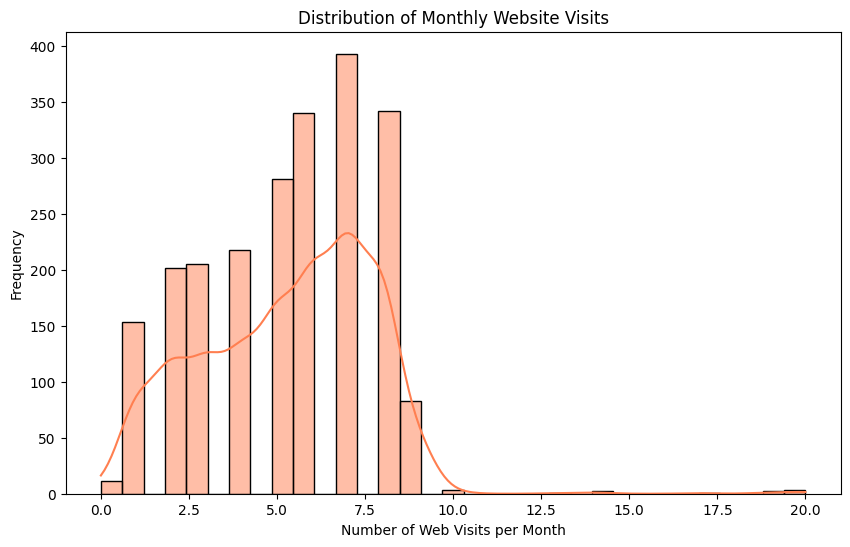

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data['NumWebVisitsMonth'], kde=True, color='coral')
plt.title('Distribution of Monthly Website Visits')
plt.xlabel('Number of Web Visits per Month')
plt.ylabel('Frequency')
plt.show()


 The distribution of monthly website visits is right-skewed, with a peak around 5-6 visits per month, indicating that a majority of users visit the website a few times each month. Understanding web visit frequency helps identify online engagement levels, which can be leveraged for web-based promotions.

### Recency of Last Purchase

<ipython-input-21-2d064b673ab3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IncomeGroup', y='Recency', data=data, palette='Blues')


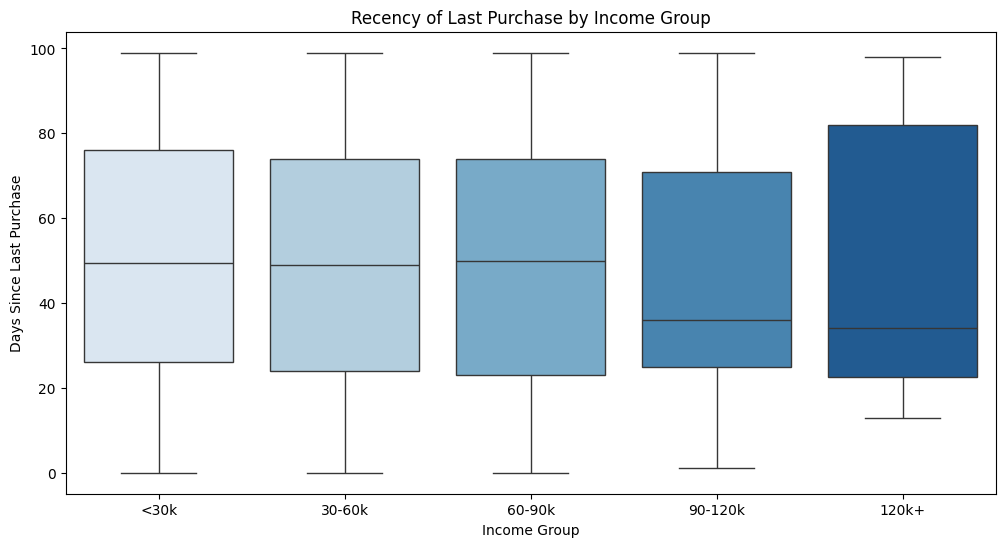

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='IncomeGroup', y='Recency', data=data, palette='Blues')
plt.title('Recency of Last Purchase by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Days Since Last Purchase')
plt.show()



Analyzing recency by income group identifies which income brackets have higher engagement here 120k+ are more active while 60-90k income groups are dormant, helping to prioritize re-engagement efforts

## Correlation Heatmap

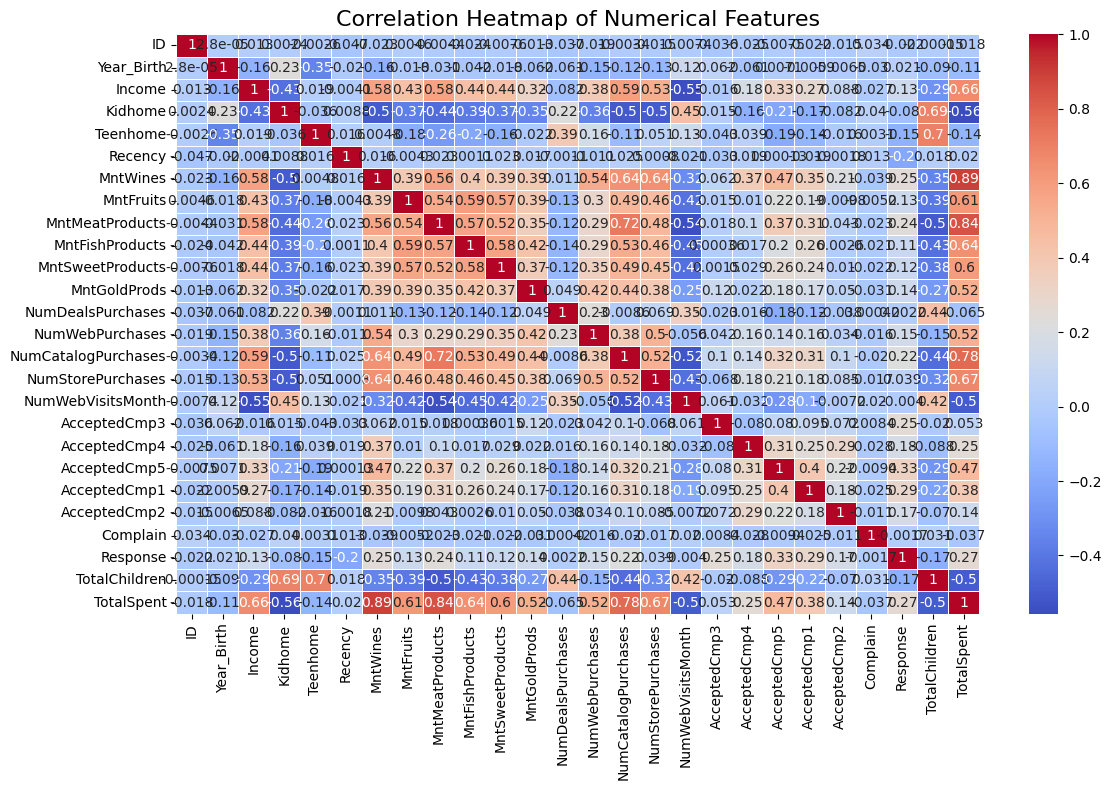

In [22]:
# Correlation heatmap
numerical_columns = data.select_dtypes(include=np.number).drop(['Z_CostContact', 'Z_Revenue'], axis=1).columns
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

## Customer Segmentation

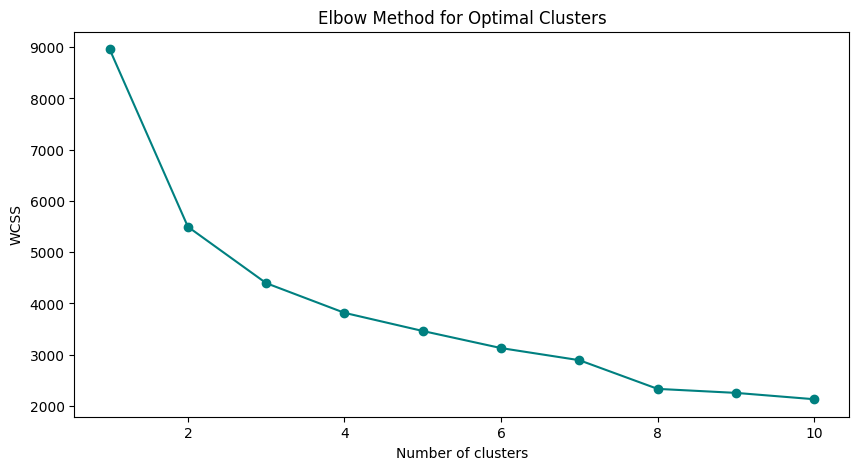

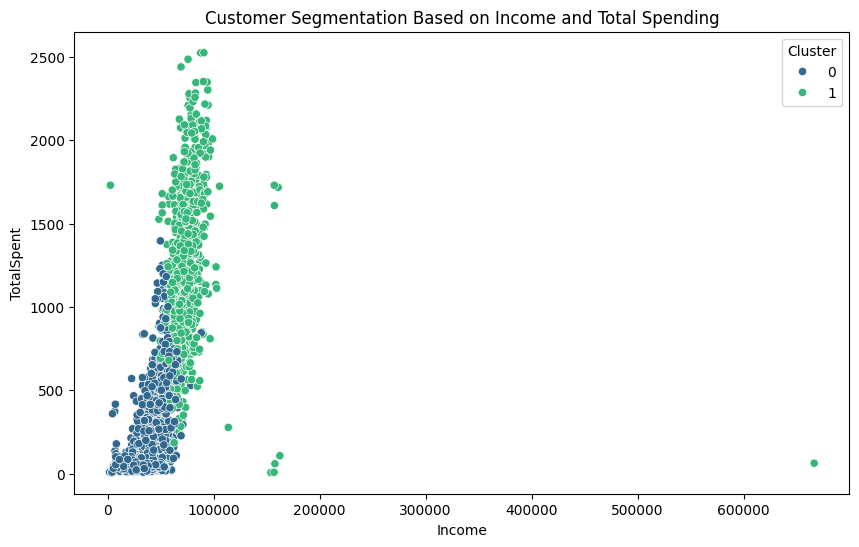

In [23]:
# Prepare features for clustering
features = data[['Income', 'TotalSpent', 'Recency', 'NumWebVisitsMonth']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal clusters using Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', color='teal')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with optimal clusters
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters based on Income and Total Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpent', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segmentation Based on Income and Total Spending')
plt.show()



The scatter plot illustrates a customer segmentation based on their income and total spending. Two distinct clusters are evident:

Cluster 0: This group consists primarily of customers with lower incomes and lower total spending. They might be categorized as budget-conscious consumers.

Cluster 1: This group comprises customers with higher incomes and higher total spending. They can be classified as high-value customers or big spenders.

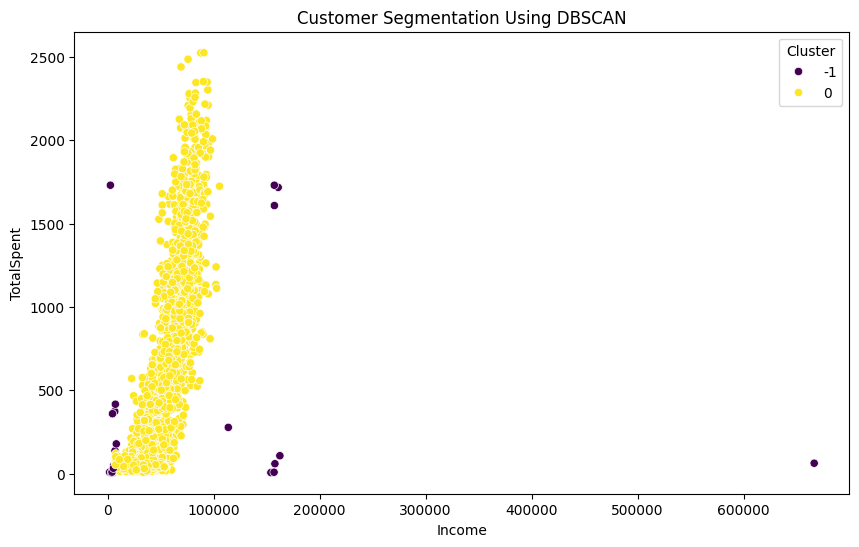

In [31]:
# Import libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Prepare features for clustering
features = data[['Income', 'TotalSpent', 'Recency', 'NumWebVisitsMonth']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Define parameters for DBSCAN (varepsilon and minSamples)
eps = 1
min_samples = 5

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(scaled_features)

# Add cluster labels to the data
data['Cluster'] = dbscan.labels_

# Visualize clusters based on Income and Total Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpent', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segmentation Using DBSCAN')
plt.show()

Cluster 0 (Budget-Conscious Customers): Lower income, moderate spending.
Cluster -1 (High-Value Customers): Wide range of income, high spending.
Cluster 0: Focus on value, discounts, and loyalty programs.
Cluster -1: Offer personalized marketing, exclusive deals, and premium services.

## Predictive Modeling

### Prepare Data for Modeling

In [29]:
# Define features (X) and target variable (y)
X = data.drop(columns=['Response', 'ID', 'Cluster', 'Dt_Customer'])  # Adjust to exclude irrelevant columns
y = data['Response']
for col in X.select_dtypes(include=['datetime64']):
    X[col] = X[col].astype(int)  # Convert datetime to numerical representation
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.8705357142857143
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       379
           1       0.69      0.29      0.41        69

    accuracy                           0.87       448
   macro avg       0.79      0.63      0.67       448
weighted avg       0.85      0.87      0.85       448



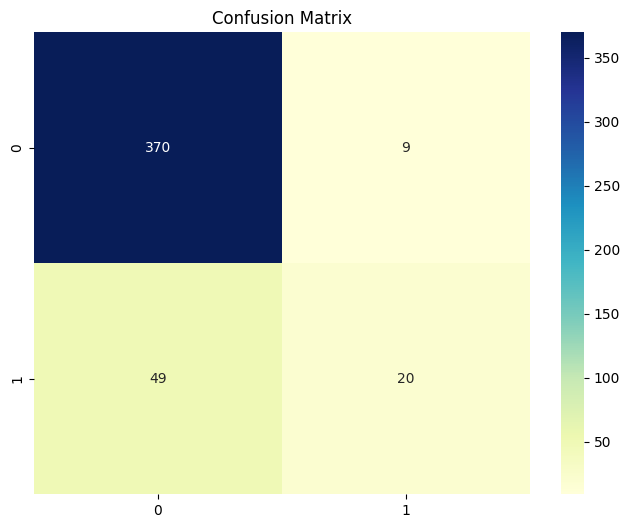

In [30]:
# Perform one-hot encoding on categorical features
X = pd.get_dummies(X)  # This will convert categorical columns to numerical using one-hot encoding

# Train-test split after encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()


This model provides predictions on campaign responses, aiding in selective targeting for profitable customer outreach